# Google play store apps Machine Learning Classification
Tarea realizada por: Rebeca Amor

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Explorando el dataset y sus datos

In [60]:
# Importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.svm import SVC
import xgboost as xgb

In [61]:
playstore=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/googleplaystore.csv')
playstore.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4410,Rock N' Cash Casino Slots -Free Vegas Slot Games,GAME,4.7,6187,33M,"100,000+",Free,0,Teen,Casino,"July 27, 2018",1.15.0,4.0.3 and up
1000,"Imgur: Find funny GIFs, memes & watch viral vi...",ENTERTAINMENT,4.3,160164,12M,"10,000,000+",Free,0,Teen,Entertainment,"August 1, 2018",4.2.0.8447,5.0 and up
10018,Food Network,FAMILY,4.1,7823,Varies with device,"500,000+",Free,0,Teen,Entertainment,"July 27, 2018",Varies with device,Varies with device
5407,AO-EVENT,BUSINESS,NaN,0,42M,100+,Free,0,Everyone,Business,"May 28, 2018",6.2.6,4.1 and up
1721,Clash Royale,GAME,4.6,23134775,97M,"100,000,000+",Free,0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up
6627,BQ Camera,PHOTOGRAPHY,3.6,2526,Varies with device,"1,000,000+",Free,0,Everyone,Photography,"July 2, 2018",Varies with device,Varies with device
1050,Citibanamex Movil,FINANCE,3.6,52306,42M,"5,000,000+",Free,0,Everyone,Finance,"July 27, 2018",20.1.0,5.0 and up
4978,"Digital Clock : Simple, Tiny, Ad-free Desk Clock.",LIFESTYLE,4.4,317,74k,"50,000+",Free,0,Everyone,Lifestyle,"December 21, 2016",3.0,2.3 and up
3915,Colorfy: Coloring Book for Adults - Free,FAMILY,4.5,787107,Varies with device,"10,000,000+",Free,0,Everyone,Entertainment,"June 20, 2018",Varies with device,Varies with device
7593,Free Fur All – We Bare Bears,FAMILY,4.2,256916,25M,"10,000,000+",Free,0,Everyone,Arcade;Action & Adventure,"October 8, 2015",1.0.4,4.0 and up


#### Analizando el dataset

In [62]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [63]:
playstore.shape

(10841, 13)

In [64]:
# Confirmamos que hay varias columnas con valores nulos
playstore.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [65]:
playstore.isna().sum().sum()

1487

In [66]:
playstore.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [67]:
# Podemos deshacernos de las columnas que no nos hagan falta
playstore=playstore.drop(["Current Ver"],axis=1)
playstore=playstore.drop(["Android Ver"],axis=1)
playstore=playstore.drop(["Last Updated"],axis=1)
playstore=playstore.drop(["Content Rating"],axis=1)
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   App       10841 non-null  object 
 1   Category  10841 non-null  object 
 2   Rating    9367 non-null   float64
 3   Reviews   10841 non-null  object 
 4   Size      10841 non-null  object 
 5   Installs  10841 non-null  object 
 6   Type      10840 non-null  object 
 7   Price     10841 non-null  object 
 8   Genres    10841 non-null  object 
dtypes: float64(1), object(8)
memory usage: 762.4+ KB


In [68]:
# Con esto, además, se reduce el número de valores nulos
playstore.isna().sum()

App            0
Category       0
Rating      1474
Reviews        0
Size           0
Installs       0
Type           1
Price          0
Genres         0
dtype: int64

In [69]:
playstore.isna().sum().sum()

1475

In [70]:
# Ahora solo quedasn los nulos de la columna Rating, así que los eliminamos y volvemos a comprobar
playstore.dropna(inplace=True)
playstore.isna().sum()

App         0
Category    0
Rating      0
Reviews     0
Size        0
Installs    0
Type        0
Price       0
Genres      0
dtype: int64

Vamos a visualizar algunos gráficos para intentar sacar conclusiones

<Axes: xlabel='Rating', ylabel='Count'>

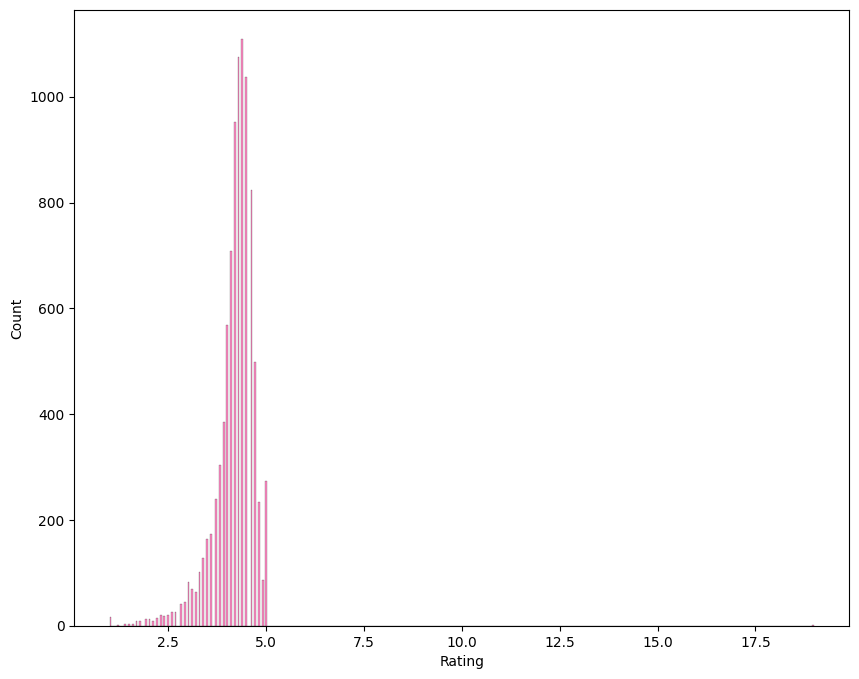

In [71]:
plt.figure(figsize=(10,8))
sns.histplot(data=playstore, x='Rating', color='hotpink')

<Axes: xlabel='Rating', ylabel='Density'>

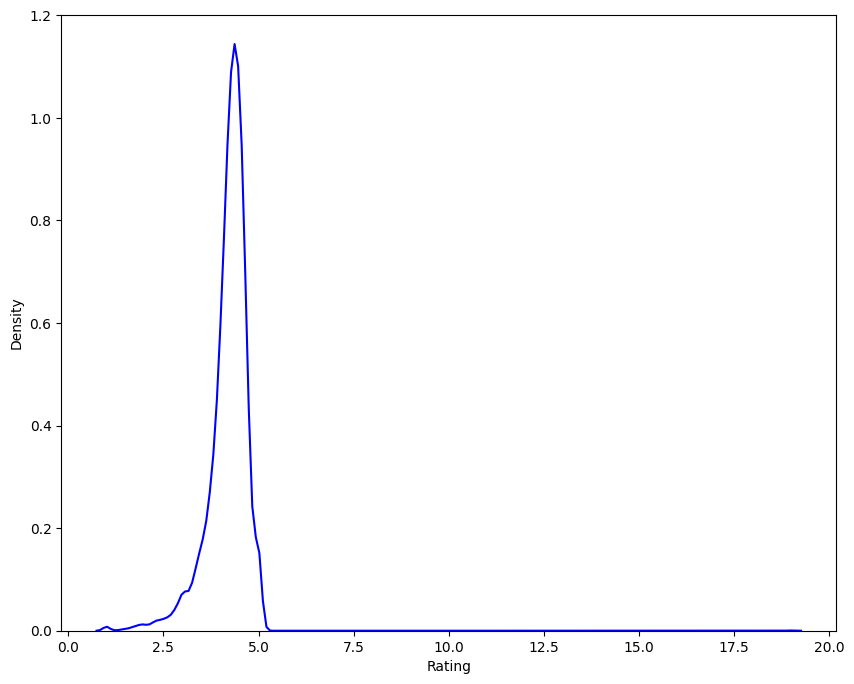

In [72]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=playstore, x='Rating', color='blue')

<Axes: xlabel='Rating', ylabel='Installs'>

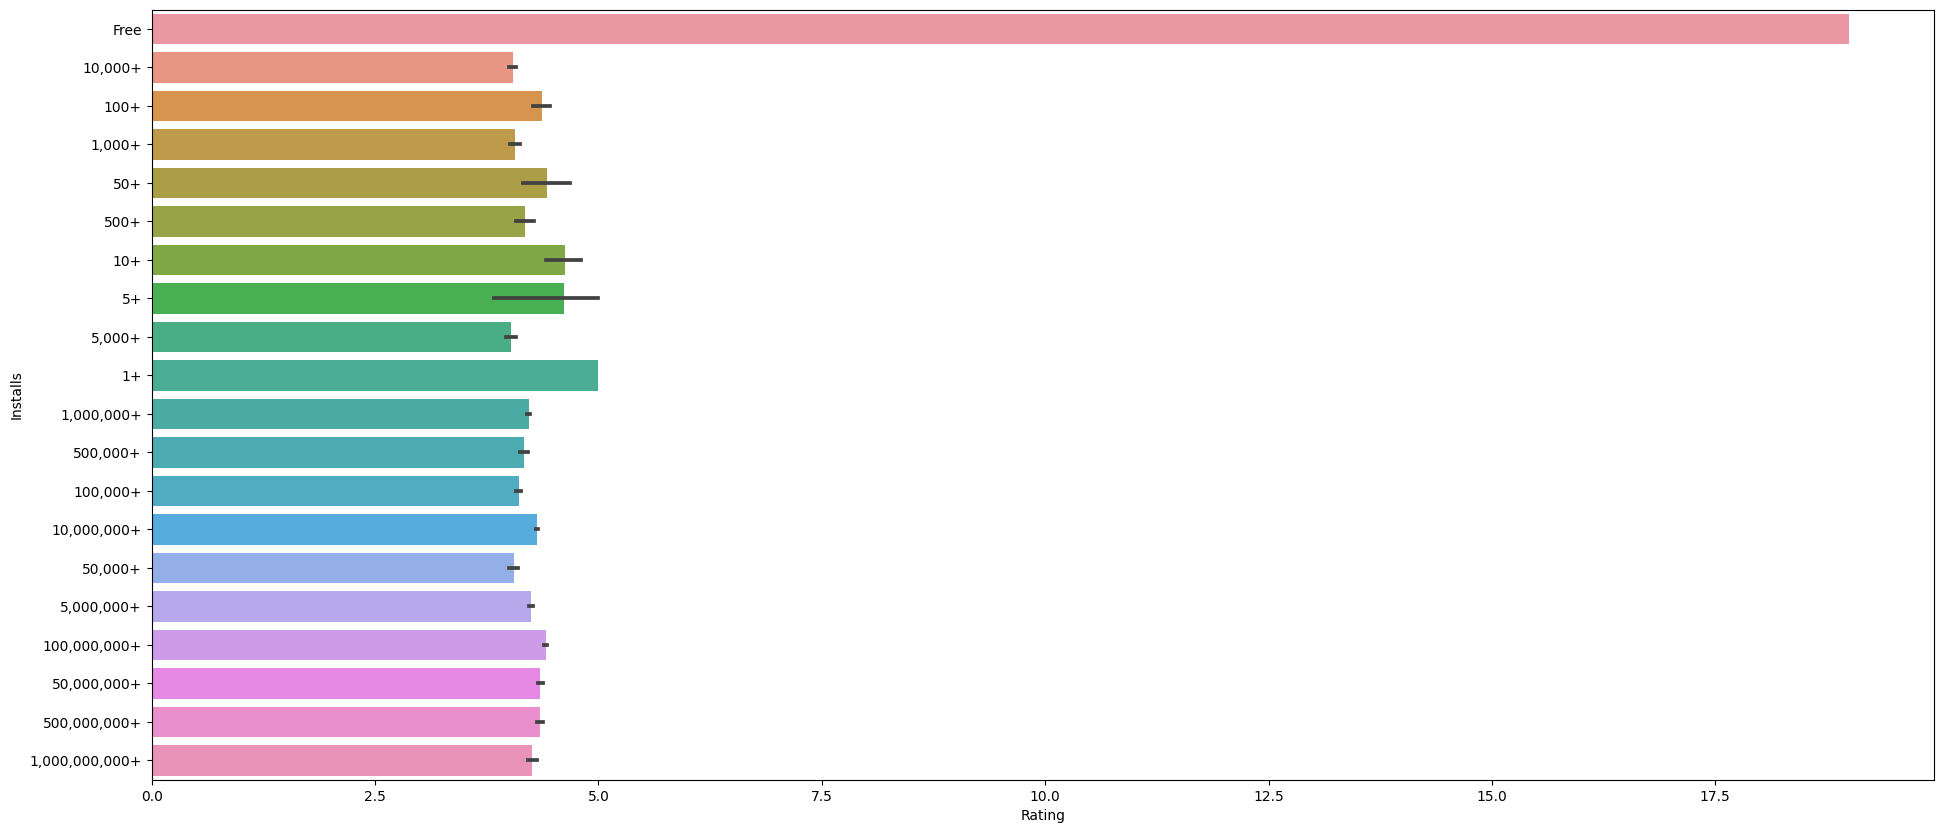

In [73]:
plt.figure(figsize=(23,10))
sns.barplot(data=playstore.sort_values(by='Rating',ascending=False), y='Installs', x='Rating')

<Axes: xlabel='Rating', ylabel='Installs'>

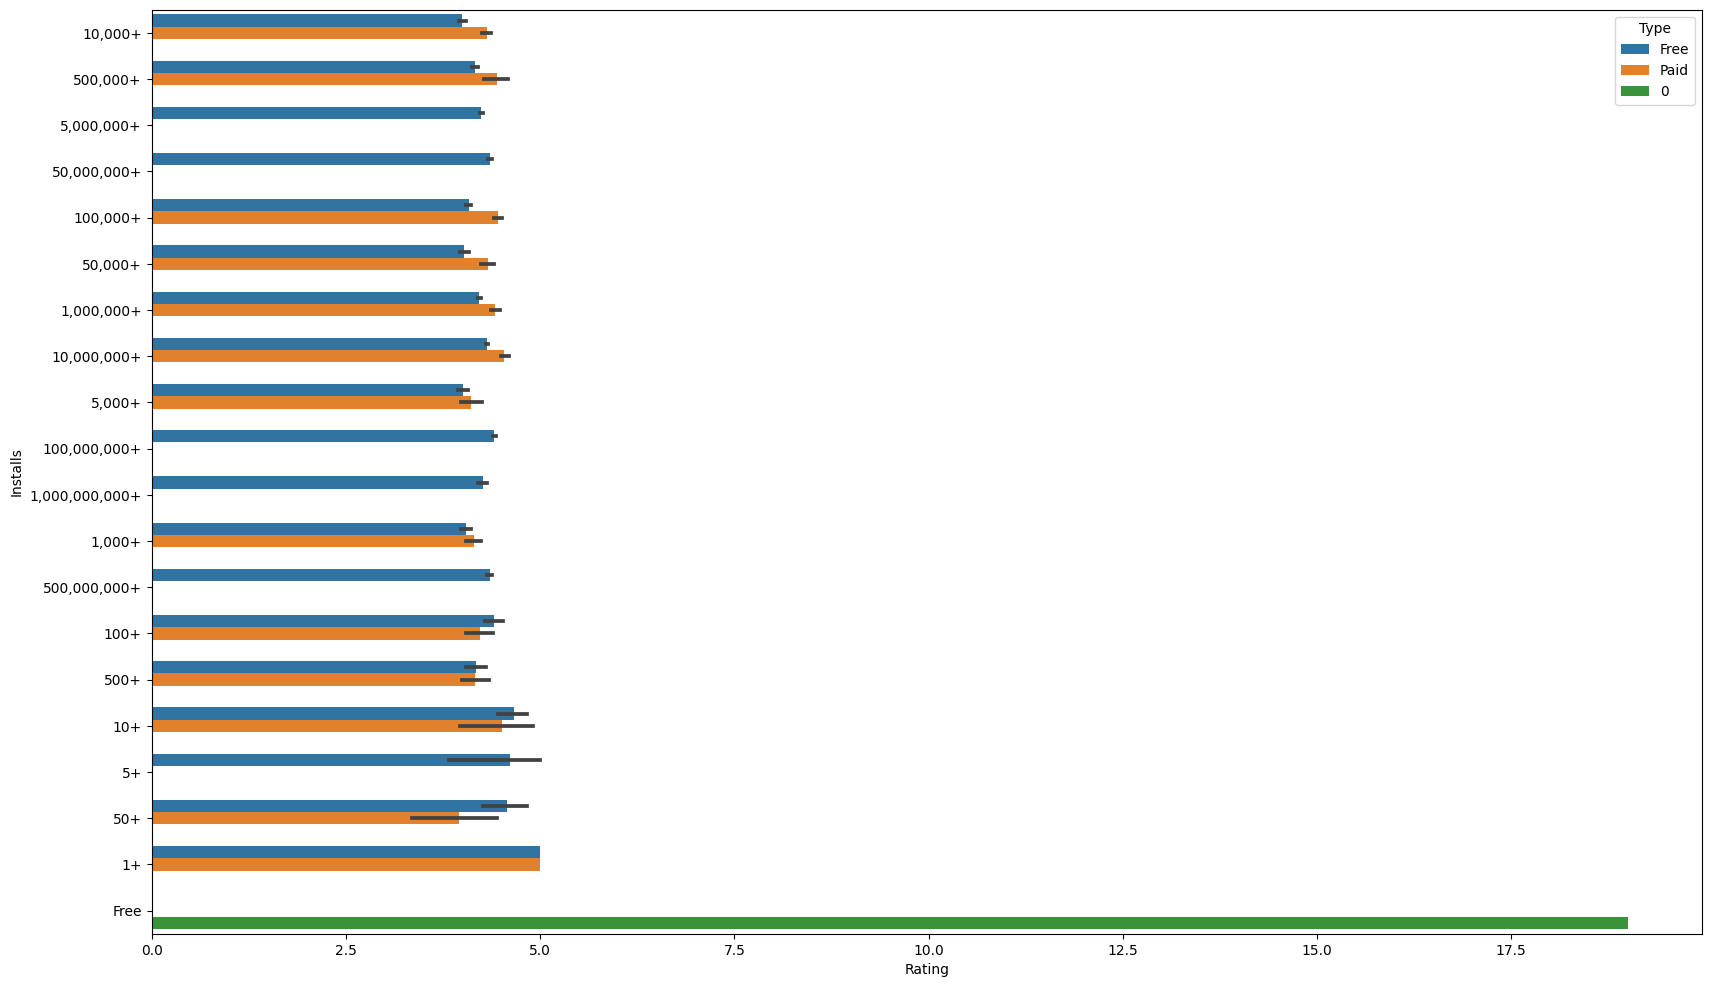

In [74]:
plt.figure(figsize=(20,12))
sns.barplot(data=playstore, x='Rating', y='Installs', hue='Type')

Al observar las gráficas, vemos que hay un valor extraño que interfiere en el análisis: hay una valoración que se sale de lo normal, pues tiene una calificación de 19, cuando solo hay del 0 al 5. Como es uno solo, lo podemos borrar y no cambiará de forma drástica el resultado final.

In [75]:
# Ordenamos el dataframe por el rating para que nos muestre el índice de esa fila
playstore.sort_values(by=['Rating'], ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,"February 11, 2018"
9511,Ek Bander Ne Kholi Dukan,FAMILY,5.0,10,3.0M,"10,000+",Free,0,Entertainment
10166,FA Player Essentials,SPORTS,5.0,7,68M,100+,Free,0,Sports
7895,Dine In CT - Food Delivery,SHOPPING,5.0,4,1.6M,"1,000+",Free,0,Shopping
5118,Eternal Light AG,SOCIAL,5.0,30,13M,100+,Free,0,Social
...,...,...,...,...,...,...,...,...,...
4127,Speech Therapy: F,FAMILY,1.0,1,16M,10+,Paid,$2.99,Education
5151,Clarksburg AH,MEDICAL,1.0,1,28M,50+,Free,0,Medical
10324,FE Mechanical Engineering Prep,FAMILY,1.0,2,21M,"1,000+",Free,0,Education
10400,Familial Hypercholesterolaemia Handbook,MEDICAL,1.0,2,33M,100+,Free,0,Medical


In [76]:
playstore.drop(playstore[(playstore['Rating']>5.0)].index, inplace=True)
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Education
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Education
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Books & Reference


Una vez hecho esto, comprobamos ahora que los gráficos son más coherentes.

<Axes: xlabel='Rating', ylabel='Installs'>

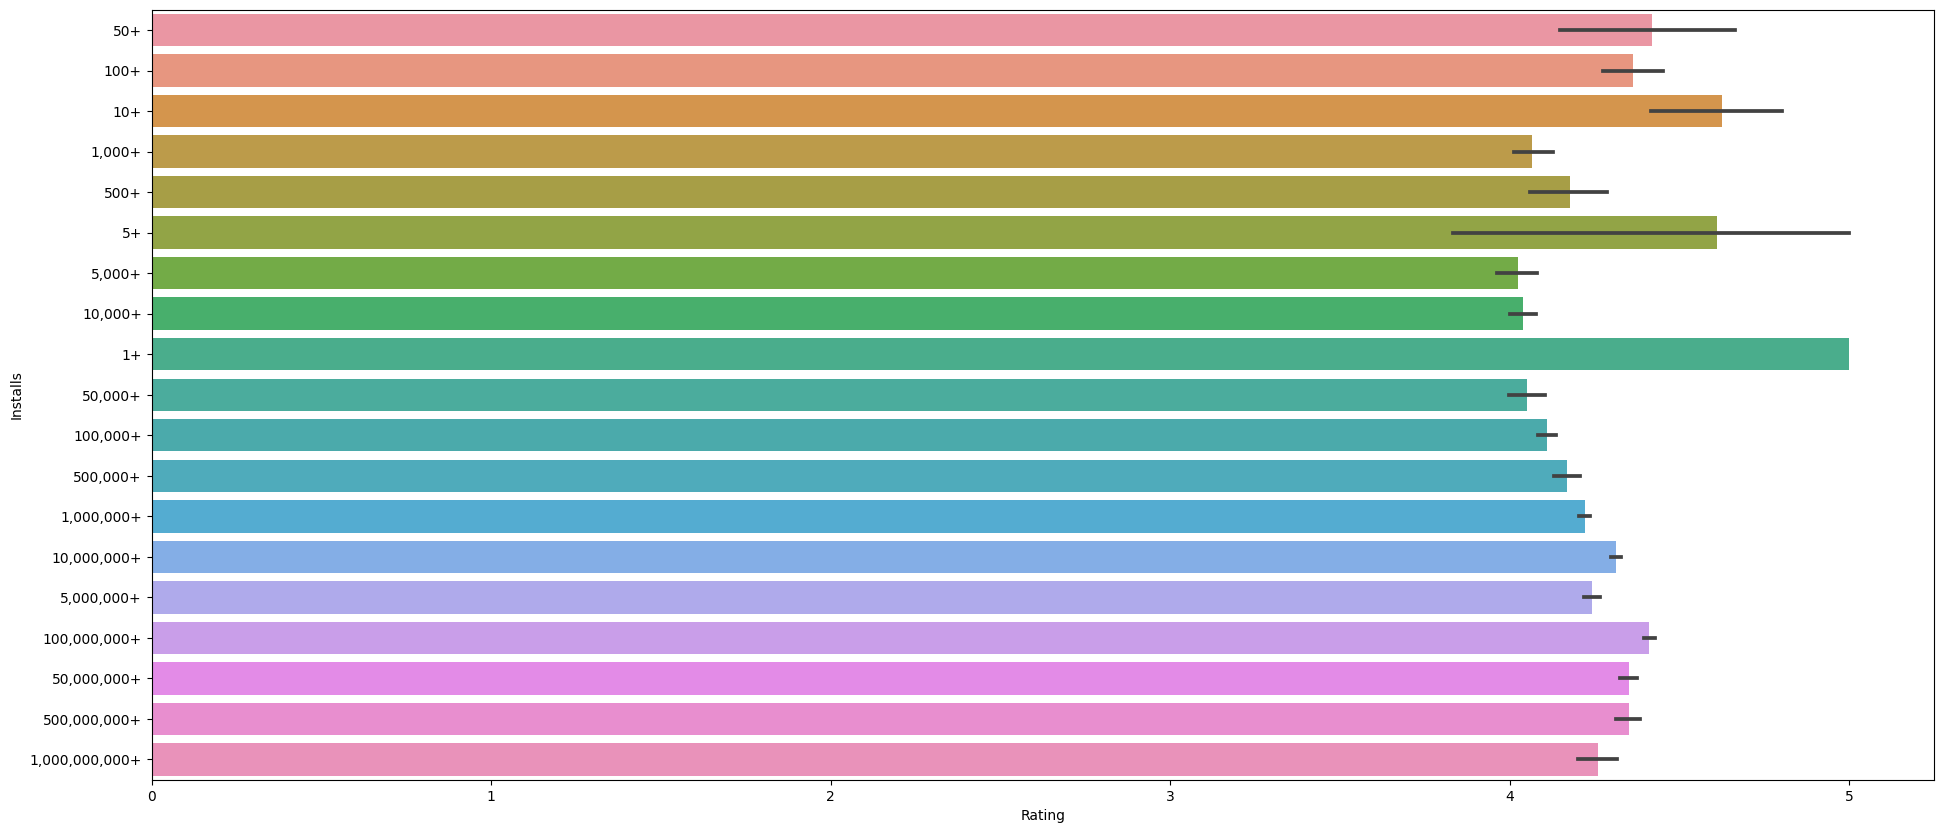

In [77]:
plt.figure(figsize=(23,10))
sns.barplot(data=playstore.sort_values(by='Rating',ascending=False), y='Installs', x='Rating')

<Axes: xlabel='Rating', ylabel='Installs'>

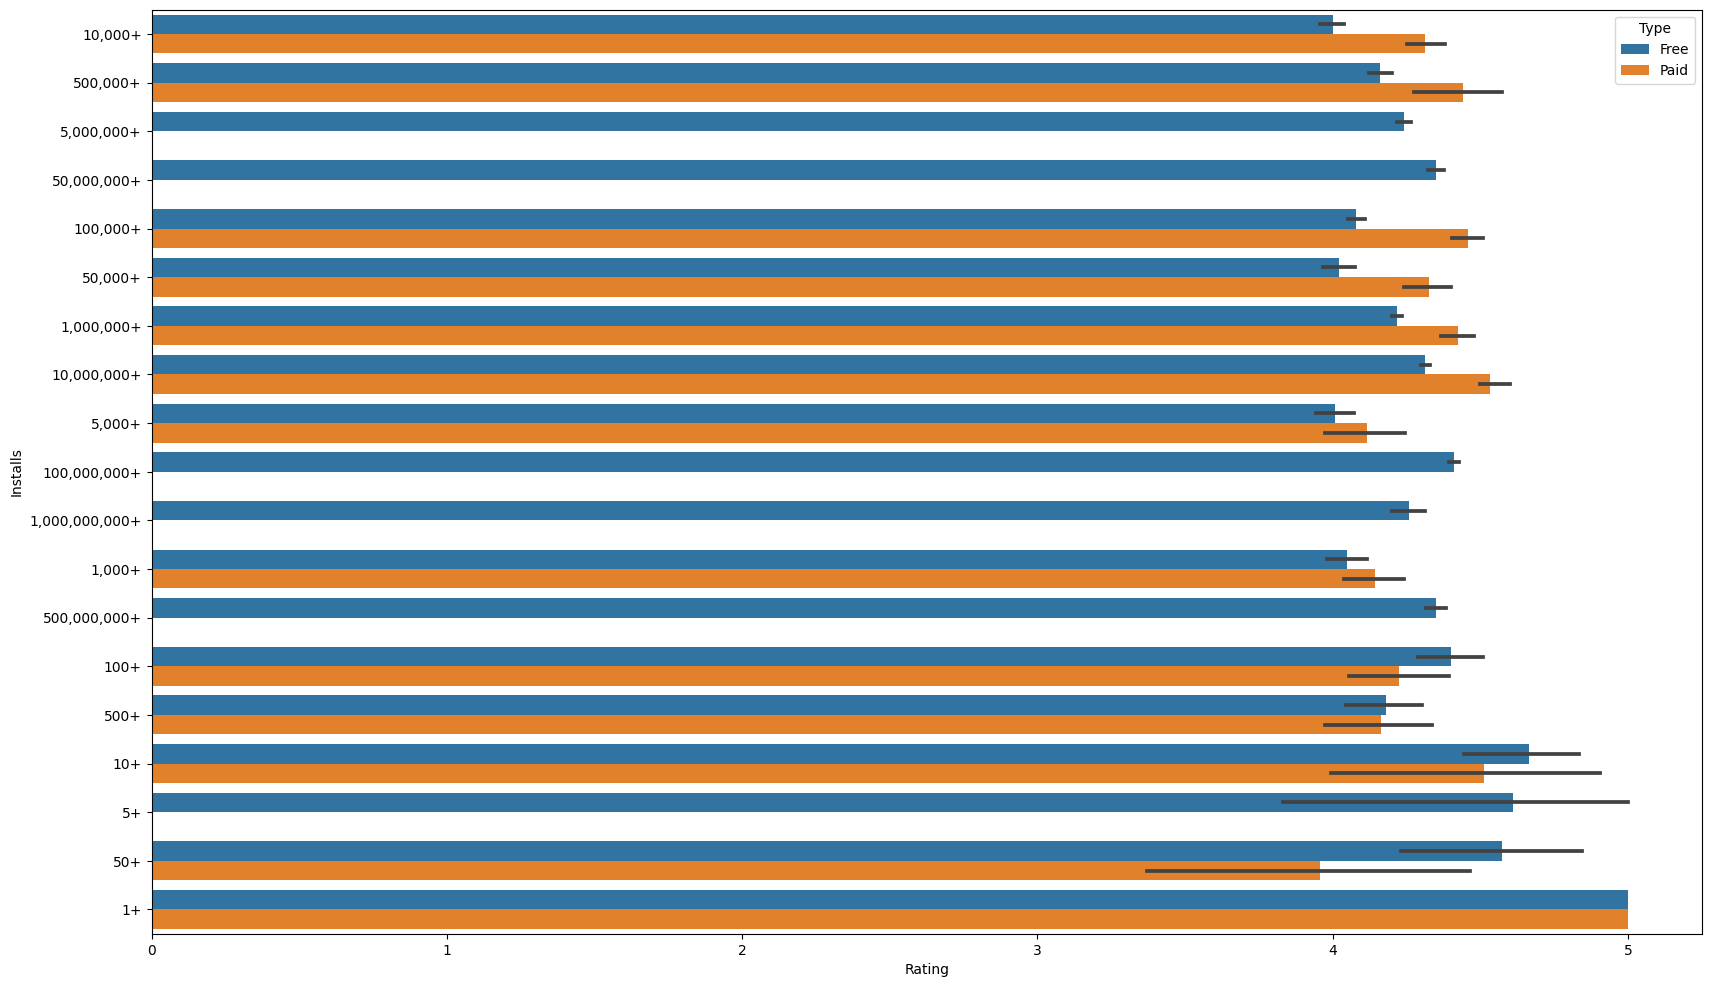

In [78]:
plt.figure(figsize=(20,12))
sns.barplot(data=playstore, x='Rating', y='Installs', hue='Type')

También podemos deducir que, obviamente, si una app no se ha descargado ninguna vez, no tiene valoraciones. Por lo que no nos sirven estas filas, así que las borramos.

In [79]:
playstore.sort_values(by=['Installs'])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25M,1+,Free,0,Medical
5917,Ra Ga Ba,GAME,5.0,2,20M,1+,Paid,$1.49,Arcade
10697,Mu.F.O.,GAME,5.0,2,16M,1+,Paid,$0.99,Arcade
5043,Flim Af Somali Hindi Fanproj,FAMILY,3.9,12,3.5M,"1,000+",Free,0,Entertainment
6223,BH Bikes Premium,SPORTS,3.0,26,15M,"1,000+",Free,0,Sports
...,...,...,...,...,...,...,...,...,...
3476,Google Calendar,PRODUCTIVITY,4.2,858208,Varies with device,"500,000,000+",Free,0,Productivity
3971,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40M,"500,000,000+",Free,0,Communication
3450,Microsoft Word,PRODUCTIVITY,4.5,2084126,Varies with device,"500,000,000+",Free,0,Productivity
2610,Snapchat,SOCIAL,4.0,17015352,Varies with device,"500,000,000+",Free,0,Social


In [80]:
playstore.drop(playstore.index[9148], inplace=True)
playstore.sort_values(by=['Installs'])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres
10697,Mu.F.O.,GAME,5.0,2,16M,1+,Paid,$0.99,Arcade
5917,Ra Ga Ba,GAME,5.0,2,20M,1+,Paid,$1.49,Arcade
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25M,1+,Free,0,Medical
7287,All Info about Cg,FAMILY,4.7,15,4.1M,"1,000+",Free,0,Education
657,French Chat Room,DATING,4.2,24,4.9M,"1,000+",Free,0,Dating
...,...,...,...,...,...,...,...,...,...
3739,Twitter,NEWS_AND_MAGAZINES,4.3,11667403,Varies with device,"500,000,000+",Free,0,News & Magazines
3994,Candy Crush Saga,FAMILY,4.4,22419455,74M,"500,000,000+",Free,0,Casual
4365,MX Player,VIDEO_PLAYERS,4.5,6469179,Varies with device,"500,000,000+",Free,0,Video Players & Editors
3522,Microsoft Word,PRODUCTIVITY,4.5,2084125,Varies with device,"500,000,000+",Free,0,Productivity


In [81]:
playstore.drop(playstore[(playstore['Installs']=='0+')].index, inplace=True)
playstore.sort_values(by=['Installs'])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres
10697,Mu.F.O.,GAME,5.0,2,16M,1+,Paid,$0.99,Arcade
5917,Ra Ga Ba,GAME,5.0,2,20M,1+,Paid,$1.49,Arcade
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25M,1+,Free,0,Medical
7287,All Info about Cg,FAMILY,4.7,15,4.1M,"1,000+",Free,0,Education
657,French Chat Room,DATING,4.2,24,4.9M,"1,000+",Free,0,Dating
...,...,...,...,...,...,...,...,...,...
3739,Twitter,NEWS_AND_MAGAZINES,4.3,11667403,Varies with device,"500,000,000+",Free,0,News & Magazines
3994,Candy Crush Saga,FAMILY,4.4,22419455,74M,"500,000,000+",Free,0,Casual
4365,MX Player,VIDEO_PLAYERS,4.5,6469179,Varies with device,"500,000,000+",Free,0,Video Players & Editors
3522,Microsoft Word,PRODUCTIVITY,4.5,2084125,Varies with device,"500,000,000+",Free,0,Productivity


<Axes: xlabel='Rating', ylabel='Installs'>

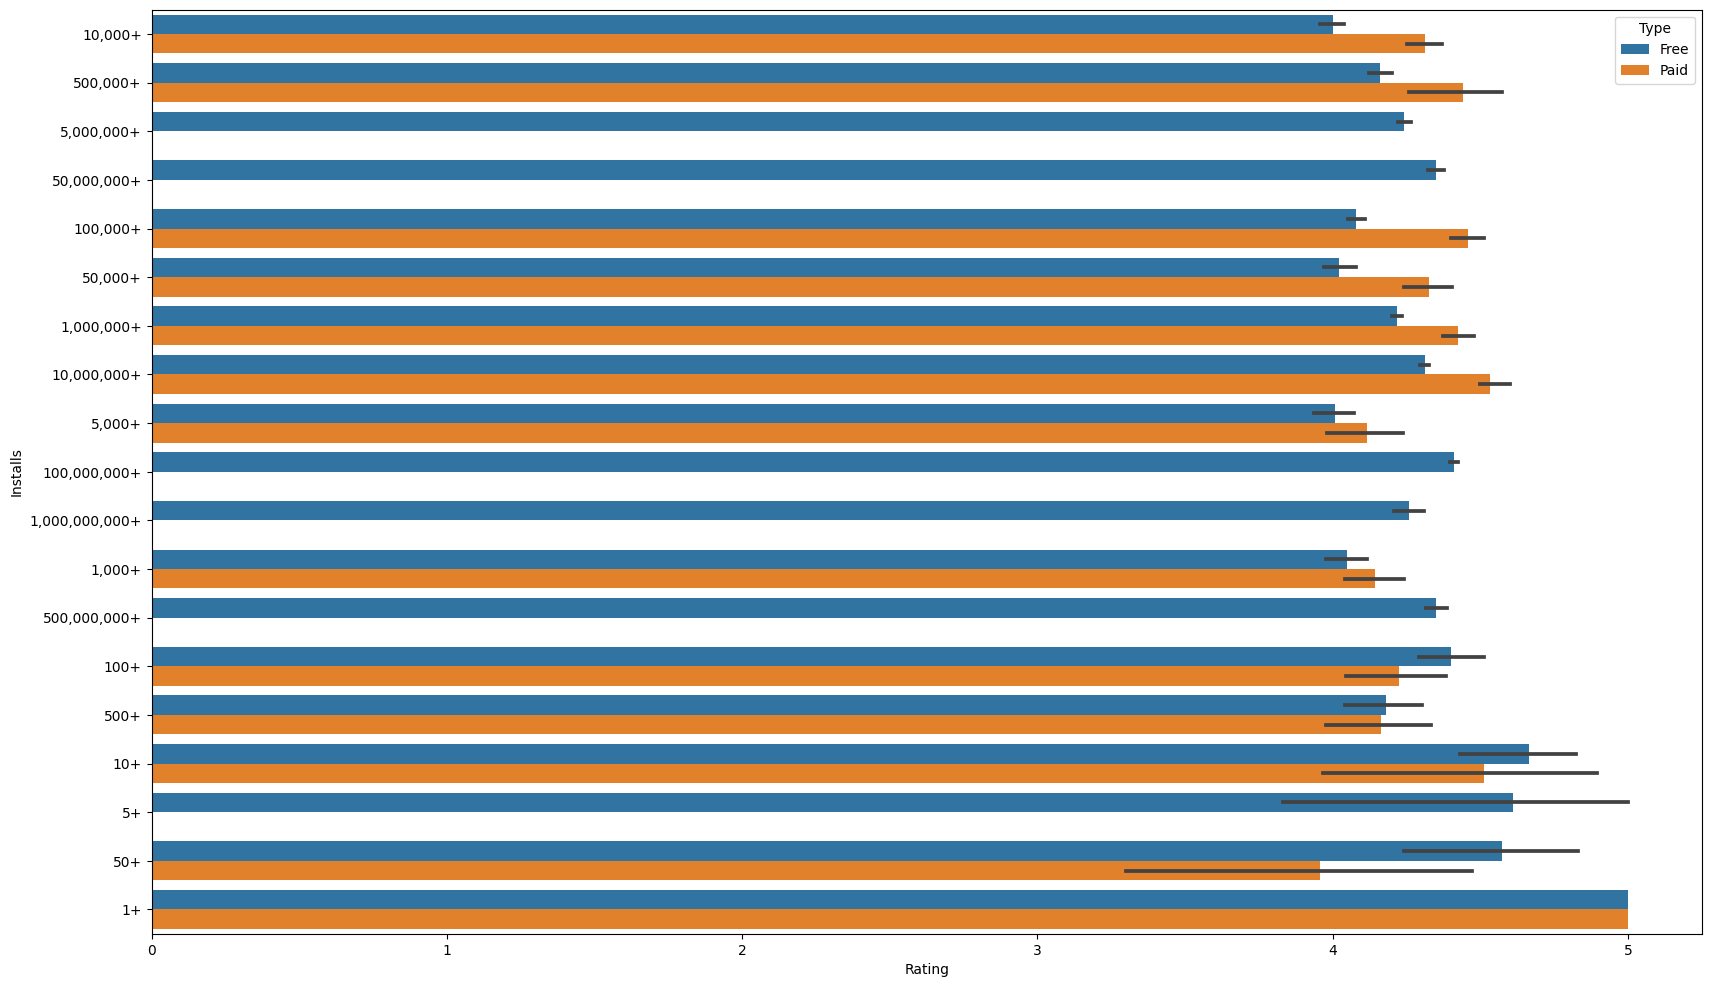

In [82]:
# El resultado entonces es este
plt.figure(figsize=(20,12))
sns.barplot(data=playstore, x='Rating', y='Installs', hue='Type')

In [83]:
# Cambiamos los valores de 'Rating' a tipo float
playstore.Rating=playstore.Rating.astype('float')

In [84]:
# Cambiamos los valores de 'Reviews' a tipo float
playstore.Reviews=playstore.Reviews.astype('float')

In [85]:
# Corregimos el formato de precios y cambiamos el tipo de datos a float
playstore.Price=playstore.Price.str.replace('$', '')
playstore.Price=playstore.Price.astype('float')

<ipython-input-85-2f2d0063afc7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  playstore.Price=playstore.Price.str.replace('$', '')


In [86]:
# Corregimos el formato del tamaño de la aplicación eliminando todas las letras
playstore.Size.head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [87]:
playstore.Size=playstore.Size.str.replace(',', '')
playstore.Size=playstore.Size.apply(lambda x: float(x[:-1])*0.001 if 'k' in x else x)

In [88]:
playstore.Size=playstore.Size.str.replace('M', '')
playstore.Size=playstore.Size.replace('Varies with device', np.NaN)
playstore.Size=playstore.Size.astype('float')

In [89]:
# Vemos cómo va quedando haciendo la media del tamaño en cada categoría
playstore.groupby('Category')['Size'].mean()

Category
ART_AND_DESIGN         12.766102
AUTO_AND_VEHICLES      21.885484
BEAUTY                 15.513514
BOOKS_AND_REFERENCE    14.682979
BUSINESS               15.401261
COMICS                 13.695745
COMMUNICATION          14.077957
DATING                 18.312717
EDUCATION              21.136111
ENTERTAINMENT          21.853333
EVENTS                 14.813514
FAMILY                 30.558532
FINANCE                19.009231
FOOD_AND_DRINK         24.163095
GAME                   45.479197
HEALTH_AND_FITNESS     24.562727
HOUSE_AND_HOME         17.505357
LIBRARIES_AND_DEMO     22.405882
LIFESTYLE              15.809559
MAPS_AND_NAVIGATION    17.815054
MEDICAL                20.260000
NEWS_AND_MAGAZINES     13.283234
PARENTING              21.579545
PERSONALIZATION        12.680859
PHOTOGRAPHY            17.748291
PRODUCTIVITY           13.877523
SHOPPING               17.688439
SOCIAL                 19.384000
SPORTS                 26.610976
TOOLS                   9.276241
T

In [90]:
# Metemos la categoría 'Travel' dentro de la categoría 'Travel_and_local' para simplificar
travel_index=playstore[playstore['Category']=='TRAVEL'].index.values
print(travel_index)
playstore.loc[travel_index, 'Category']='TRAVEL_AND_LOCAL'

[]


In [91]:
# Calculamos la media de cada grupo de categorías para rellenar los valores NaN
playstore[playstore['Size'].isna()].index.values
playstore.Size
playstore.Size.isna().sum()
playstore['Size']=playstore.groupby('Category')['Size'].transform(lambda x: x.fillna(x.mean()))

In [92]:
playstore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Genres'],
      dtype='object')

In [93]:
# Eliminamos el nombre de las apps porque realmenbte no son relevantes para el entrenamiento
playstore=playstore.drop(['App'], axis=1)
playstore.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Genres'],
      dtype='object')

In [94]:
# Checkeamos la cantidad de valores en cada grupo de la variable 'Installs'
playstore.Installs.value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [95]:
"""
playstore.loc[playstore['Installs'].isin(['0+', '1+', '5+', '10+', '50+']), 'Installs']='0 - 100'
playstore.loc[playstore['Installs']=='100+', 'Installs']='100 - 500'
playstore.loc[playstore['Installs']=='500+', 'Installs']='500 - 1,000'
playstore.loc[playstore['Installs']=='1,000+', 'Installs']='1,000 - 5,000'
playstore.loc[playstore['Installs']=='5,000+', 'Installs']='5,000 - 10,000'
playstore.loc[playstore['Installs']=='10,000+', 'Installs']='10,000 - 50,000'
playstore.loc[playstore['Installs']=='50,000+', 'Installs']='50,000 - 100,000'
playstore.loc[playstore['Installs']=='100,000+', 'Installs']='100,000 - 500,000'
playstore.loc[playstore['Installs']=='500,000+', 'Installs']='500,000 - 1,000,000'
playstore.loc[playstore['Installs']=='1,000,000+', 'Installs']='1,000,000 - 5,000,000'
playstore.loc[playstore['Installs']=='5,000,000+', 'Installs']='5,000,000 - 10,000,000'
playstore.loc[playstore['Installs']=='10,000,000+', 'Installs']='10,000,000 - 50,000,000'
playstore.loc[playstore['Installs']=='50,000,000+', 'Installs']='50,000,000 - 100,000,000'
playstore.loc[playstore['Installs']=='100,000,000+', 'Installs']='100,000,000 - 500,000,000'
playstore.loc[playstore['Installs']=='500,000,000+', 'Installs']='500,000,000 - 1,000,000,000'
playstore.loc[playstore['Installs']=='1,000,000,000+', 'Installs']='1,000,000,000 - 5,000,000,000'
playstore.loc[playstore['Installs']=='5,000,000,000+', 'Installs']='5,000,000,000+'

playstore.Installs=pd.Categorical(playstore.Installs, ['0 - 100','100 - 500', '500 - 1,000', '1,000 - 5,000', '5,000 - 10,000', '10,000 - 50,000', '50,000 - 100,000', '100,000 - 500,000', '500,000 - 1,000,000','1,000,000 - 5,000,000', '5,000,000 - 10,000,000', '10,000,000 - 50,000,000', '50,000,000 - 100,000,000','100,000,000 - 500,000,000', '500,000,000 - 1,000,000,000', '1,000,000,000 - 5,000,000,000', '5,000,000,000+'])
"""

"\nplaystore.loc[playstore['Installs'].isin(['0+', '1+', '5+', '10+', '50+']), 'Installs']='0 - 100'\nplaystore.loc[playstore['Installs']=='100+', 'Installs']='100 - 500'\nplaystore.loc[playstore['Installs']=='500+', 'Installs']='500 - 1,000'\nplaystore.loc[playstore['Installs']=='1,000+', 'Installs']='1,000 - 5,000'\nplaystore.loc[playstore['Installs']=='5,000+', 'Installs']='5,000 - 10,000'\nplaystore.loc[playstore['Installs']=='10,000+', 'Installs']='10,000 - 50,000'\nplaystore.loc[playstore['Installs']=='50,000+', 'Installs']='50,000 - 100,000'\nplaystore.loc[playstore['Installs']=='100,000+', 'Installs']='100,000 - 500,000'\nplaystore.loc[playstore['Installs']=='500,000+', 'Installs']='500,000 - 1,000,000'\nplaystore.loc[playstore['Installs']=='1,000,000+', 'Installs']='1,000,000 - 5,000,000'\nplaystore.loc[playstore['Installs']=='5,000,000+', 'Installs']='5,000,000 - 10,000,000'\nplaystore.loc[playstore['Installs']=='10,000,000+', 'Installs']='10,000,000 - 50,000,000'\nplaystore.

In [96]:
# Tiene demasiadas columnas, por lo que grupamos el número de descargas para simplificar, le aplicamos uma reducción y comprobamos de nuevo
playstore.loc[playstore['Installs'].isin(['0+', '1+', '5+', '10+', '50+']), 'Installs']='0 - 100'
playstore.loc[playstore['Installs']=='100+', 'Installs']='100 - 500'
playstore.loc[playstore['Installs']=='500+', 'Installs']='500 - 1,000'
playstore.loc[playstore['Installs']=='1,000+', 'Installs']='1,000 - 5,000'
playstore.loc[playstore['Installs']=='5,000+', 'Installs']='5,000 - 10,000'
playstore.loc[playstore['Installs']=='10,000+', 'Installs']='10,000 - 50,000'
playstore.loc[playstore['Installs']=='50,000+', 'Installs']='50,000 - 100,000'
playstore.loc[playstore['Installs']=='100,000+', 'Installs']='100,000 - 500,000'
playstore.loc[playstore['Installs']=='500,000+', 'Installs']='500,000 - 1,000,000'
playstore.loc[playstore['Installs']=='1,000,000+', 'Installs']='1,000,000 - 5,000,000'
playstore.loc[playstore['Installs']=='5,000,000+', 'Installs']='5,000,000 - 10,000,000'
playstore.loc[playstore['Installs']=='10,000,000+', 'Installs']='10,000,000 - 50,000,000'
playstore.loc[playstore['Installs']=='50,000,000+', 'Installs']='50,000,000 - 100,000,000'
playstore.loc[playstore['Installs']=='100,000,000+', 'Installs']='100,000,000 - 500,000,000'
playstore.loc[playstore['Installs']=='500,000,000+', 'Installs']='500,000,000 - 1,000,000,000'
playstore.loc[playstore['Installs']=='1,000,000,000+', 'Installs']='1,000,000,000 - 5,000,000,000'
playstore.loc[playstore['Installs']=='5,000,000,000+', 'Installs']='5,000,000,000+'

#playstore.Installs=pd.Categorical(playstore.Installs, ['0 - 100','100 - 500', '500 - 1,000', '1,000 - 5,000', '5,000 - 10,000', '10,000 - 50,000', '50,000 - 100,000', '100,000 - 500,000', '500,000 - 1,000,000','1,000,000 - 5,000,000', '5,000,000 - 10,000,000', '10,000,000 - 50,000,000', '50,000,000 - 100,000,000','100,000,000 - 500,000,000', '500,000,000 - 1,000,000,000', '1,000,000,000 - 5,000,000,000', '5,000,000,000+'])

playstore.loc[playstore['Installs'].isin(['0 - 100', '100 - 500', '500 - 1,000']), 'Installs']='0 - 1,000'
playstore.loc[playstore['Installs'].isin(['1,000 - 5,000', '5,000 - 10,000']), 'Installs']='1,000 - 10,000'
playstore.loc[playstore['Installs'].isin(['10,000 - 50,000', '50,000 - 100,000']), 'Installs']='10,000 - 100,000'
playstore.loc[playstore['Installs'].isin(['100,000 - 500,000', '500,000 - 1,000,000']), 'Installs']='100,000 - 1,000,000'
playstore.loc[playstore['Installs'].isin(['1,000,000 - 5,000,000', '5,000,000 - 10,000,000']), 'Installs']='1,000,000 - 10,000,000'
playstore.loc[playstore['Installs'].isin(['10,000,000 - 50,000,000', '50,000,000 - 100,000,000']), 'Installs']='10,000,000 - 100,000,000'
playstore.loc[playstore['Installs'].isin(['100,000,000 - 500,000,000', '500,000,000 - 1,000,000,000']), 'Installs']='100,000,000 - 1,000,000,000'
playstore.loc[playstore['Installs'].isin(['1,000,000,000 - 5,000,000,000', '5,000,000,000+']), 'Installs']  = '1,000,000,000+'

playstore.Installs=pd.Categorical(playstore.Installs, ['0 - 1,000','1,000 - 10,000', '10,000 - 100,000', '100,000 - 1,000,000', '1,000,000 - 10,000,000', '10,000,000 - 100,000,000', '100,000,000 - 1,000,000,000', '1,000,000,000+'])

In [97]:
playstore.Installs.value_counts().sort_index()

0 - 1,000                       647
1,000 - 10,000                 1145
10,000 - 100,000               1477
100,000 - 1,000,000            1688
1,000,000 - 10,000,000         2328
10,000,000 - 100,000,000       1541
100,000,000 - 1,000,000,000     481
1,000,000,000+                   58
Name: Installs, dtype: int64

In [98]:
playstore.shape

(9365, 8)

In [99]:
# Creamos una nueva columna de Games con las categorías de los juegos
games=playstore['Category'].str.contains('GAME')
playstore['Game_genre']=playstore.loc[games, 'Category']
playstore['Game_genre']
playstore['Game_genre']=playstore['Game_genre'].str.replace('GAME_', '')

In [100]:
# Combinamos todos los tipos de Game dentro de la nueva categoría
playstore.loc[games, 'Category']='GAME'

In [101]:
# Comprobamos
playstore.Game_genre.count()

1097

In [102]:
playstore.Category.value_counts()

FAMILY                 1746
GAME                   1097
TOOLS                   734
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
PERSONALIZATION         314
LIFESTYLE               314
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

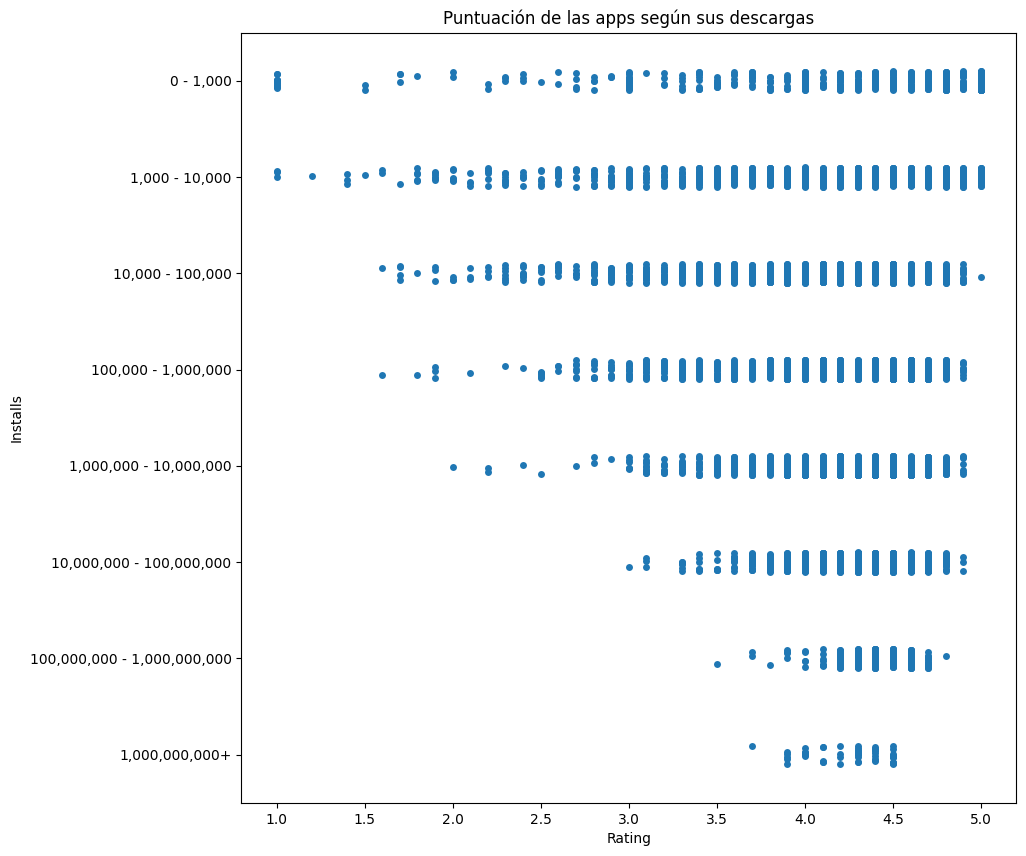

In [103]:
# Lo vemos con gráficos
plt.figure(figsize=(10,10))
ax=sns.stripplot(x="Rating", y="Installs", data=playstore)
ax.set_title('Puntuación de las apps según sus descargas');

<ipython-input-104-de1e9f353400>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45);


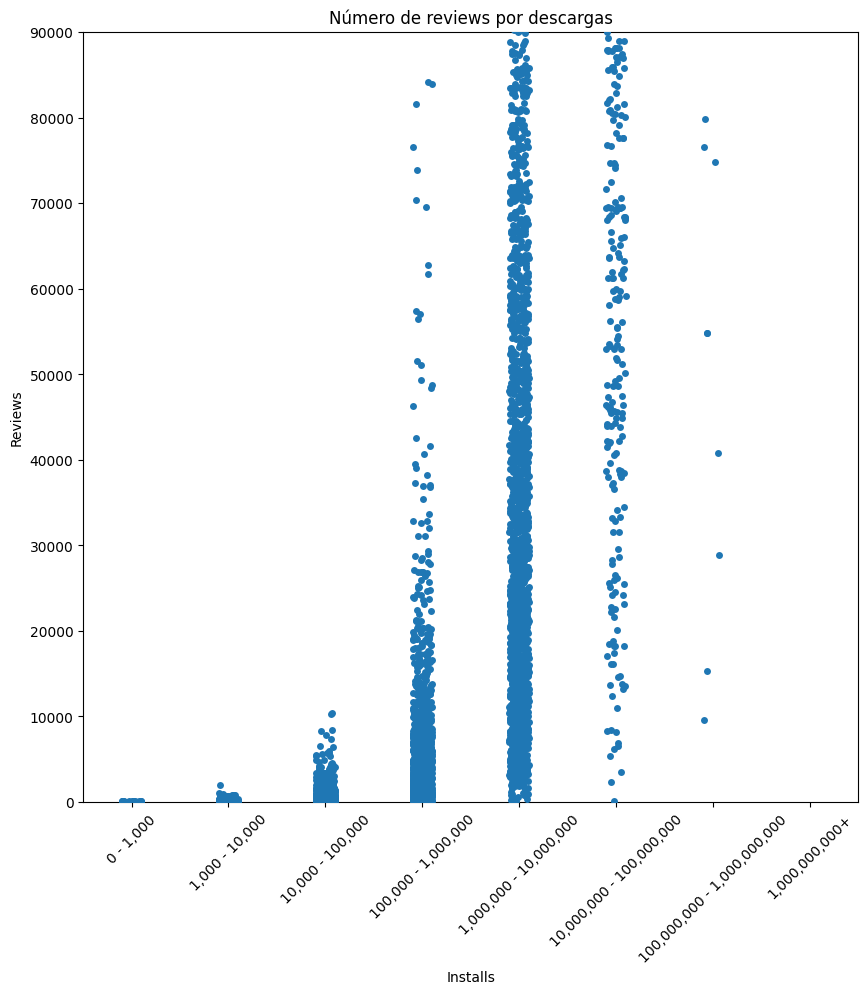

In [104]:
plt.figure(figsize=(10,10))
ax=sns.stripplot(x="Installs", y="Reviews",data=playstore[playstore['Installs'].isin(['0 - 1,000','1,000 - 10,000', '10,000 - 100,000', '100,000 - 1,000,000', '1,000,000 - 10,000,000', '10,000,000 - 100,000,000', '100,000,000 - 1,000,000,000', '1,000,000,000+'])], order=['0 - 1,000','1,000 - 10,000', '10,000 - 100,000', '100,000 - 1,000,000', '1,000,000 - 10,000,000', '10,000,000 - 100,000,000', '100,000,000 - 1,000,000,000', '1,000,000,000+'])

ax.set_title('Número de reviews por descargas')
ax.set_ylim(0,90000)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

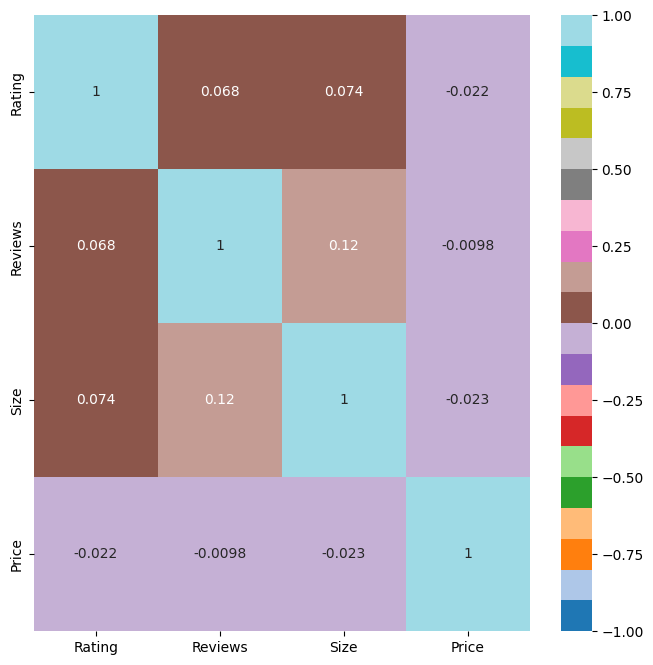

In [105]:
# Matriz de correlación
plt.figure(figsize=(8,8))
sns.heatmap(playstore.corr(), vmin=-1, cmap='tab20', annot=True);

### Entrenamiento

In [106]:
playstore.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Genres', 'Game_genre'],
      dtype='object')

In [107]:
# Para comenzar el entrenamiento, nos desharemos de todas las columnas innecesarias que sí hemos usado antes
playstore.drop(['Type', 'Installs', 'Genres', 'Size','Game_genre', 'Category'], axis=1, inplace=True)
playstore.columns

Index(['Rating', 'Reviews', 'Price'], dtype='object')

In [108]:
#Train Test Split
X=playstore.drop('Rating',axis=1)
y=playstore['Rating'].values
y=y.astype('int')

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=3)

#### SVM

In [109]:
#SVM regressor
svc_r=SVC(kernel='rbf')
svc_r.fit(X_train,y_train)
svr_pred=svc_r.predict(X_test)
svr_cm=confusion_matrix(y_test,svr_pred)
svr_ac=accuracy_score(y_test, svr_pred)

print('SVM train data accuracy',svc_r.score(X_train, y_train))  
print('SVM test data accuracy', svc_r.score(X_test,y_test))
print('SVM cross validation accuracy', np.mean(cross_val_score(svc_r,X, y, cv=5)))

SVM train data accuracy 0.7577415910304325
SVM test data accuracy 0.7565403096636412
SVM cross validation accuracy 0.7575013347570743


#### Random Forest Classifier

In [111]:
# RandomForest Classifier Train
rf=RandomForestClassifier(max_depth=20, n_estimators=100)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_train)

acc=accuracy_score(y_train, y_pred)
print("Precisión de los datos de Random Forest Train: {:.2f}".format(acc))

# RandomForest Classifier Test
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

acc=accuracy_score(y_test, y_pred)
print("Exactitud de Random Forest Test: {:.5f}".format(acc))

# RandomForest Cross Val
b=np.mean(cross_val_score(rf, X, y, scoring='accuracy', cv=10))
print("Random Forest Cross validation accuracy: {:.2f}".format(b))

Precisión de los datos de Random Forest Train: 0.83
Exactitud de Random Forest Test: 0.73198
Random Forest Cross validation accuracy: 0.73


#### KNN

In [112]:
# El clasificador de los K vecinos
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
print('knn train data accuracy', knn.score(X_train, y_train))  
print('knn test data accuracy', knn.score(X_test,y_test))
print('knn cross validation accuracy', np.mean(cross_val_score(knn,X, y, cv=5)))

knn train data accuracy 0.7738921516284036
knn test data accuracy 0.7047517351841964
knn cross validation accuracy 0.7034703683929525


#### XGBOOST

In [124]:
xgb_reg=xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_reg.fit(X_train, y_train)
predictions=xgb_reg.predict(X_train)
xgb_mse=mean_squared_error(y_train, predictions)
xgb_rmse=np.sqrt(xgb_mse)
xgb_rmse

0.4753941215479966

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--------------
Matriz de confusión:
[[   3    0   12   25    7]
 [   1    3   38  133    7]
 [   7   13  196 1150    8]
 [  13   24  518 5108   14]
 [  36    2   38   87   49]]


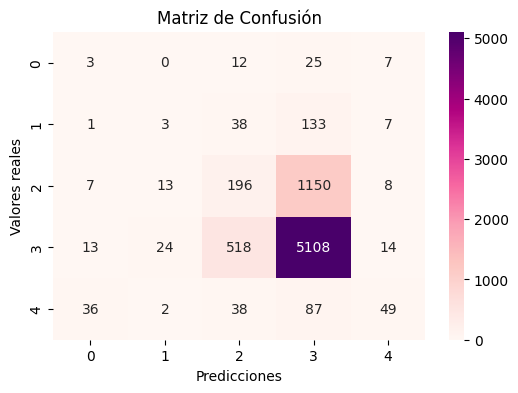

--------------
Accuracy: 0.7319807794981313
--------------
Classification report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        49
           3       0.27      0.12      0.17       336
           4       0.78      0.92      0.85      1417
           5       0.48      0.48      0.48        62

    accuracy                           0.73      1873
   macro avg       0.31      0.30      0.30      1873
weighted avg       0.66      0.73      0.69      1873



In [125]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm=confusion_matrix(y_train, y_train_pred)
acc=accuracy_score(y_test, y_pred)
report=classification_report(y_test, y_pred)
y_train_pred=cross_val_predict(knn, X_train, y_train, cv=3)

y_train_perfect_predictions=y_train
confusion_matrix(y_train, y_train_perfect_predictions)

print("--------------")
print("Matriz de confusión:")
print(cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='g', cmap='RdPu')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

print("--------------")
print("Accuracy:", acc)
print("--------------")
print("Classification report:")
print(report)

Precisión: 	 [0.05 0.07 0.24 0.79 0.58] 0.3455543620077087
Recall: 	 [0.06 0.02 0.14 0.9  0.23] 0.270773116883989
F1: 		 [0.06 0.03 0.18 0.84 0.33] 0.2863451843951739
Precisión: 	 0.66 0.6583746417305826
Recall: 	 0.72 0.7152963160704752
F1: 		 0.68 0.6789349755864833


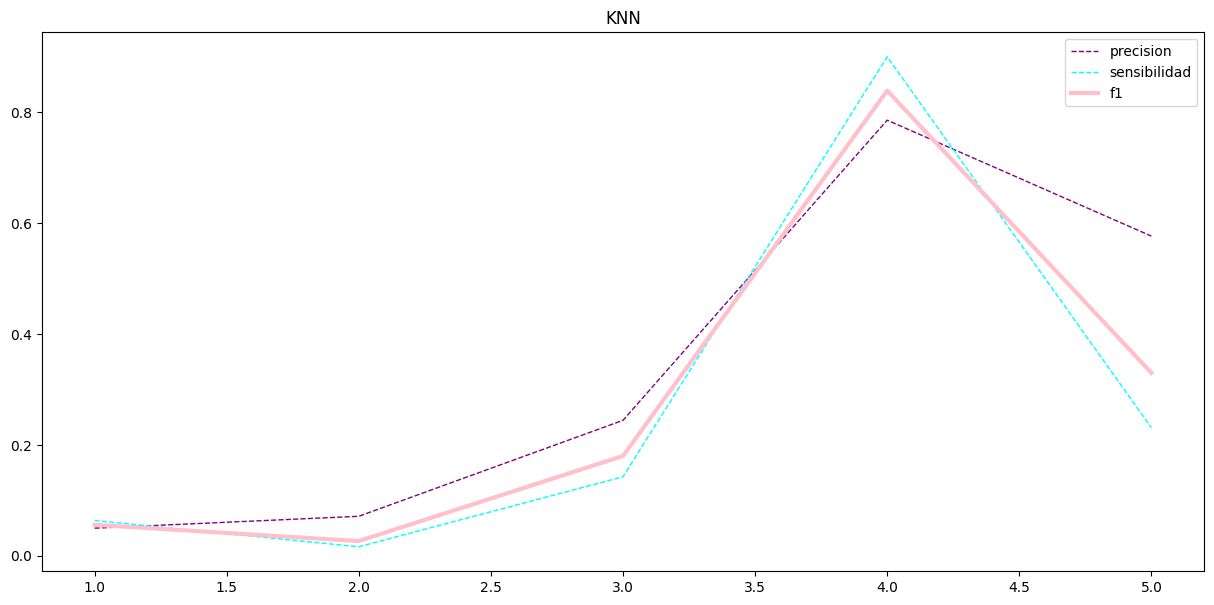

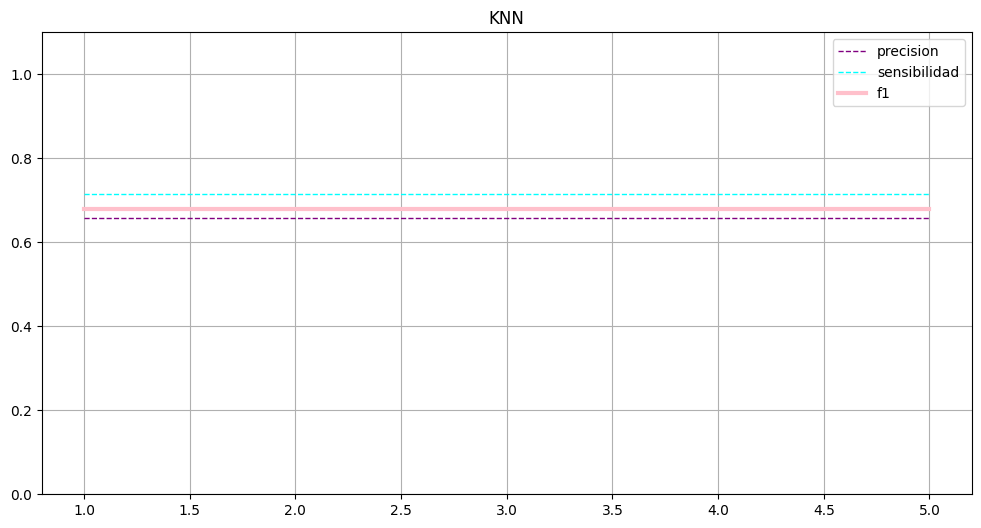

In [126]:
# Visualizaremos las gráficas de los resultados para comprobar la diferencia
class_names=[1,2,3,4,5]

precision=precision_score(y_train, y_train_pred, average=None)
recall=recall_score(y_train, y_train_pred, average=None)
f1=f1_score(y_train, y_train_pred, average = None)

print("Precisión:","\t", np.round(precision,2), np.mean(precision));
print("Recall:","\t", np.round(recall, 2), np.mean(recall));
print("F1:","\t\t", np.round(f1, 2), np.mean(f1));
        
plt.figure(figsize=(15, 7))
ax=sns.lineplot(x=class_names, y=precision, linewidth=1.0, color="purple", linestyle="--", label='precision');
ax=sns.lineplot(x=class_names, y=recall, linewidth=1.0, color="aqua", linestyle="--",label='sensibilidad');
ax=sns.lineplot(x=class_names, y=f1, linewidth=3.0, color="pink",label='f1');
ax.set_title(f"KNN");

precision=precision_score(y_train, y_train_pred, average='weighted')
recall=recall_score(y_train, y_train_pred, average='weighted')
f1=f1_score(y_train, y_train_pred, average='weighted')

print("Precisión:","\t", np.round(precision,2), np.mean(precision));
print("Recall:","\t", np.round(recall, 2), np.mean(recall));
print("F1:","\t\t", np.round(f1, 2), np.mean(f1));

plt.figure(figsize=(12, 6))
ax=sns.lineplot( x=class_names, y=precision, linewidth=1.0, color="purple", linestyle="--", label='precision');
ax=sns.lineplot(x=class_names, y=recall, linewidth=1.0, color="aqua", linestyle="--",label='sensibilidad');
ax=sns.lineplot(x=class_names, y=f1, linewidth=3.0, color="pink",label='f1');
ax.set_title(f"KNN");
ax.set_ylim(0,1.1);
plt.grid(axis='y')
plt.grid(axis='x')
plt.legend();
plt.show();